<a href="https://colab.research.google.com/github/AndBranco/tensor-flow/blob/main/TF-Learning-Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A method for finding the best learning rate in neural networks**<br/>An approach using TensorFlow and visual features.

##**Initial considerations**
> This blog post covers Deep Learning with Neural Networks and how it can be developed efficiently by tuning the Learning Rate hyper-parameter. It can be potentially interesting for data enthusiasts, practitioners, and professionals.

##**Introduction**
Neural networks are a type of machine learning that powers deep learning algorithms. They are inspired by the human brain and mimic the way biological neurons communicate. Such models consist of layers of nodes, usually including an input layer, one or more hidden layers, and an output layer. Each node, also known as an artificial neuron, is connected to another and has an associated weight and limit. How many times these models will run to learn patterns among the data depends on their layers' architecture and the appropriate tuning of the Learning Rate.<br>
This blog aims to explore an experimental dataset that involves binary classification and visually examines the effects of changing the Learning Rate in a Neural Network model training process.

##**Recommendation**
If you are not familiar with the terminologies mentioned here and do not understand how Neural Networks learn, it is highly recommended to watch the [video](https://www.youtube.com/watch?v=IHZwWFHWa-w) produced by 3Blue1Brown – YouTube channel – before proceeding.

##**Approach**
Let's start by importing the TensorFlow library – which has been commonly aliased as TF in the developer community – and checking its version – it recommends using one from 2.0 onwards. Also, the following code block prints the development date and time – just as a good practice in the code.



In [17]:
import tensorflow as tf
import datetime

print(tf.__version__)
print(f"Development: {datetime.datetime.now()}")

2.15.0
Development: 2024-02-03 15:43:20.160357


As previously stated, the forthcoming code block will employ an experimental dataset. The dataset in question is a toy dataset, provided by the Sklearn Python library -- check the documentation through the link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html. The dataset consists of 1000 samples and has a noise level of 0.3. The random seed for this dataset is set at 42.

In [18]:
from sklearn.datasets import make_circles

X, y = make_circles(
    n_samples=10000,
    noise=0.03,
    random_state=42
)

To visualize the dataset and the objective of our approach, the following code block demonstrates the data points. Our task is to predict whether a data point is dark or light blue.

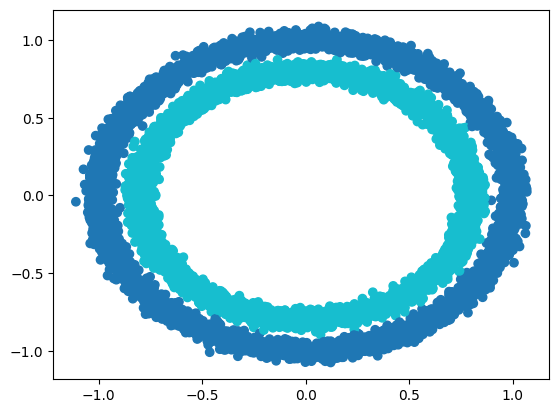

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap="tab10")

With the challenge clearly defined, it would be appropriate to move on to the next step, which involves training, compiling, tuning the model, and verifying results systematically as typically made in the Artificial Neural Networks application by data scientists and researchers.

##**Training the model**
To validate the model, the next block of code creates two random subsets of data - 77% for training and 33% for testing. The model aims to learn patterns in the training set and then to try to predict the target variable from the test set, allowing us to infer whether the model is really good.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.33, random_state=42
)

##**Baseline model**
As a starting point, it has built a model with a typical Neural Network architecture for a binary classification - next code block - problem to improve it through another model, changing the learning rate hyperparameter. Thus, to measure how quickly the model learns, the strategy is to observe how many times the model spent to reach an accuracy score of 0.9 as a didactic proposes – the metric must be appropriate for each problem, be careful, and stay secure if it provides a good assessment according to the context and data structure.

In [200]:
tf.random.set_seed(42)

mod_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

mod_0.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

history = mod_0.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20
210/210 [==============================] - 2s 4ms/step - loss: 0.6982 - accuracy: 0.4897 - val_loss: 0.6930 - val_accuracy: 0.4852
Epoch 2/20
210/210 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.4848 - val_loss: 0.6887 - val_accuracy: 0.5355
Epoch 3/20
210/210 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.5485 - val_loss: 0.6844 - val_accuracy: 0.5276
Epoch 4/20
210/210 [==============================] - 1s 3ms/step - loss: 0.6844 - accuracy: 0.5243 - val_loss: 0.6805 - val_accuracy: 0.5373
Epoch 5/20
210/210 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5343 - val_loss: 0.6750 - val_accuracy: 0.5367
Epoch 6/20
210/210 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5422 - val_loss: 0.6688 - val_accuracy: 0.5821
Epoch 7/20
210/210 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.5788 - val_loss: 0.6609 - val_accuracy: 0.6252
Epoch 

When observing in the above output, the baseline model hasn't reached a 0.9 accuracy score before 16 of 20 executing times - technically called epochs. Consecutively, the following two code blocks collect the training and test results and plot them in a panel - aiming to verify what must have happened with the baseline model.

In [201]:
y_train_pred = tf.round(mod_0.predict(X_train))
y_test_pred = tf.round(mod_0.predict(X_test))
y_train_pred_res = list(map(lambda x: x[0] if x[0] == x[1] else .5, zip(y_train, y_train_pred)))
y_test_pred_res = list(map(lambda x: x[0] if x[0] == x[1] else .5, zip(y_test, y_test_pred)))

104/104 [==============================] - 0s 1ms/step


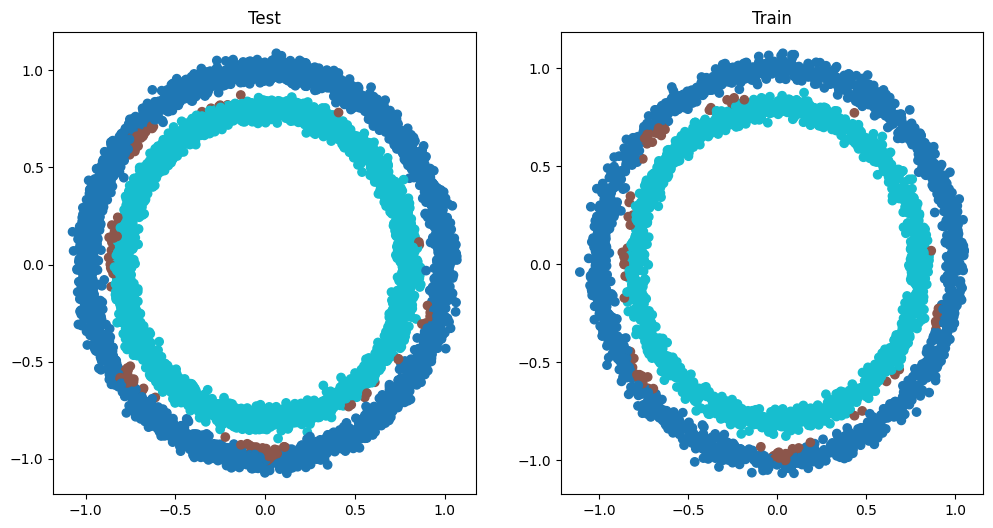

In [202]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test")
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_pred_res, cmap="tab10")
plt.subplot(1, 2, 2)
plt.title("Train")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_pred_res, cmap="tab10")
plt.show()

The above two graphs combined show visually the inaccurate results, represented by brown points. In a more technical visual assessment, the following code block creates a graph enabling the analysis of the metrics performance of both the training and test set.

Text(0.5, 1.0, 'mod_0 courves')

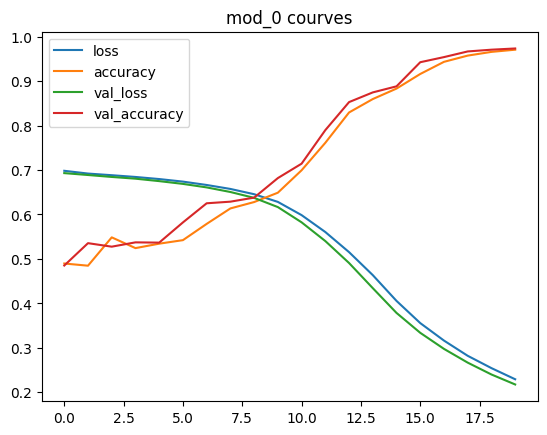

In [203]:
import pandas as pd

pd.DataFrame(history.history).plot()
plt.title("mod_0 courves")

The orange and red lines labeled accuracy and val_accuracy represent the accuracy metrics of the training and testing set - respectively. Both lines started near 0.5 and then slowly increased until they reached about 0.97 - given that, the closer to 1.0 the better. On the other hand, the blue and green lines labeled loss and val_loss, representing the loss metric of the training and testing set, start near 0.69 and then slowly decrease until reaching about 0.2 - given that the closer from 0.0 is better.

## **Finding the Learning Rate**
Now, it's time to search for a better Learn Rate parameter - by default is 0.001. Since the baseline model, the Optimizer parameter chosen is the Adam optimizer with the mission to find the optimal assessment metrics combined - in other words, to find the highest accuracy with the lowest loss possible. If the Learning Rate is very low, the model can spend more time learning than necessary, in case high rate, the model can not able to find the optimal point between both metrics accuracy and loss.
For this reason, the following code block implements the callbacks technique running the same baseline model 20 times, starting with the 0.0001 Learning Rate and increasing it by intervals of 0.00002. After this code block, the next one builds a visual analysis of this process.

In [204]:
tf.random.set_seed(seed=42)

mod_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

mod_1.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_1 = mod_1.fit(
    X_train, y_train,
    epochs=100,
    callbacks=[lr_scheduler],
    verbose=0
)

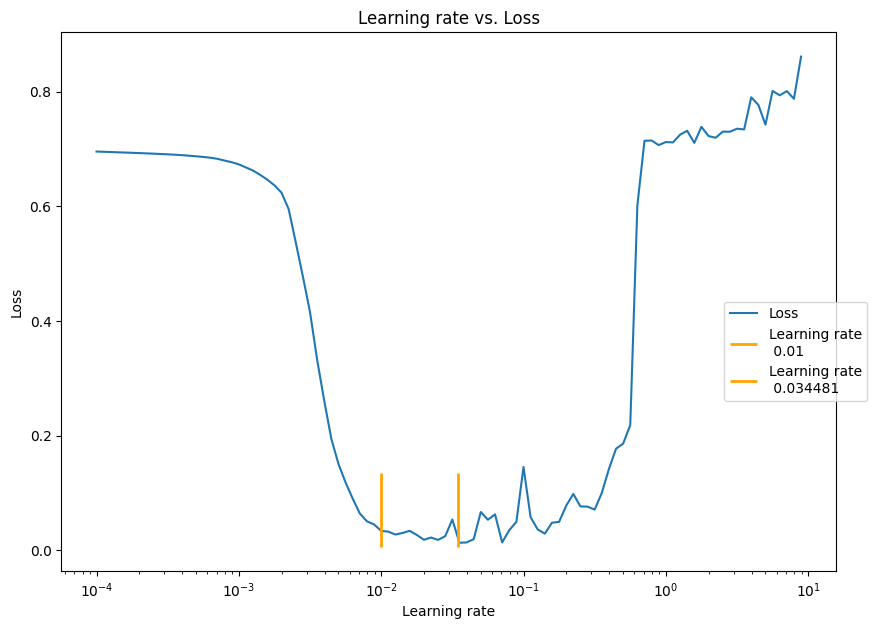

In [215]:
import numpy as np

lrs = 1e-4 * (10**(np.arange(100)/20))

min_loss = min(history_1.history['loss'])
min_loss_lr = [(x,y) for x,y in zip(history_1.history['loss'], lrs) if x == min_loss ]
min1 = min_loss_lr[0][1] - (1e-4 * 10)
min2 = 1e-2 #put manually for teaching purposes only
ymin = min_loss_lr[0][0]-(min_loss_lr[0][0]/2)
ymax = min_loss_lr[0][0]*10

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_1.history['loss'], label="Loss")
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")
plt.vlines(x=min2, ymin=ymin, ymax=ymax, colors='orange', linestyles='-', lw=2, label=f"Learning rate\n {round(min2,6)}")
plt.vlines(x=min1, ymin=ymin, ymax=ymax, colors='orange', linestyles='-', lw=2, label=f"Learning rate\n {round(min1,6)}")
plt.legend(bbox_to_anchor=(1.04,0.5), borderaxespad=0)
plt.show()

Selecting the right learning rate is critical when training a model. Typically, the best learning rate is chosen just as the loss curve approaches its minimum value while still decreasing progressively. To identify this value, a common practice is to pick the learning rate at the point where the loss is still decreasing, but not yet plateauing, which is typically about 10 times smaller than the curve's minimum value. According to the graph above, the optimal learning rate is estimated to be between 0.01 and 0.035, and this choice can be used as a starting point for training the model.

## **Adjusted model**
Now it's time to run a model with the same structure as the baseline model, except for the new Learning Rate value.

In [219]:
tf.random.set_seed(seed=42)

mod_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

mod_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history = mod_2.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20
210/210 [==============================] - 1s 3ms/step - loss: 0.6715 - accuracy: 0.5672 - val_loss: 0.6326 - val_accuracy: 0.6430
Epoch 2/20
210/210 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8681 - val_loss: 0.1674 - val_accuracy: 0.9921
Epoch 3/20
210/210 [==============================] - 0s 2ms/step - loss: 0.0913 - accuracy: 0.9969 - val_loss: 0.0571 - val_accuracy: 0.9955
Epoch 4/20
210/210 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9975 - val_loss: 0.0393 - val_accuracy: 0.9945
Epoch 5/20
210/210 [==============================] - 1s 2ms/step - loss: 0.0317 - accuracy: 0.9946 - val_loss: 0.0305 - val_accuracy: 0.9945
Epoch 6/20
210/210 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9967 - val_loss: 0.0226 - val_accuracy: 0.9964
Epoch 7/20
210/210 [==============================] - 1s 2ms/step - loss: 0.0204 - accuracy: 0.9960 - val_loss: 0.0352 - val_accuracy: 0.9870
Epoch 

While the baseline model spent 16 execution times to reach a 0.9 accuracy score when observing the above output, the adjusted model has reached such metric in 3 executing times - technically called epochs.  Consecutively, the following two code blocks collect the training and test results and plot them in a panel - aiming to verify what must have happened with the baseline model.

In [ ]:
y_train_pred = np.round(mod_2.predict(X_train))
y_test_pred = np.round(mod_2.predict(X_test))
y_train_pred_res = list(map(lambda x: x[0] if x[0] == x[1] else .5, zip(y_train, y_train_pred)))
y_test_pred_res = list(map(lambda x: x[0] if x[0] == x[1] else .5, zip(y_test, y_test_pred)))

104/104 [==============================] - 0s 1ms/step


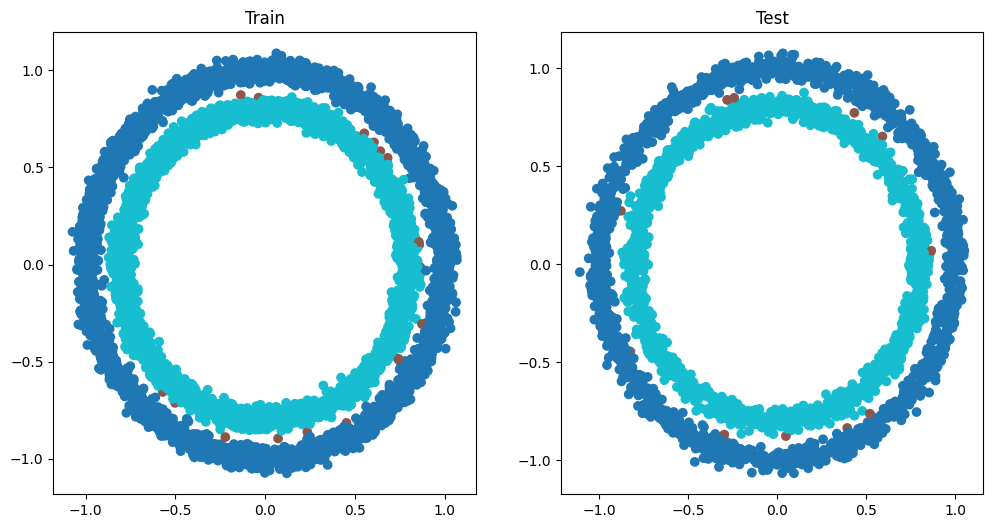

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_pred_res, cmap="tab10")
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_pred_res, cmap="tab10")
plt.show()

The above two graphs combined show visually the inaccurate results, represented by brown points. In a more technical visual assessment, the following code block creates a graph enabling the analysis of the metrics performance of both the training and test set.

Text(0.5, 1.0, 'mod_2 courves')

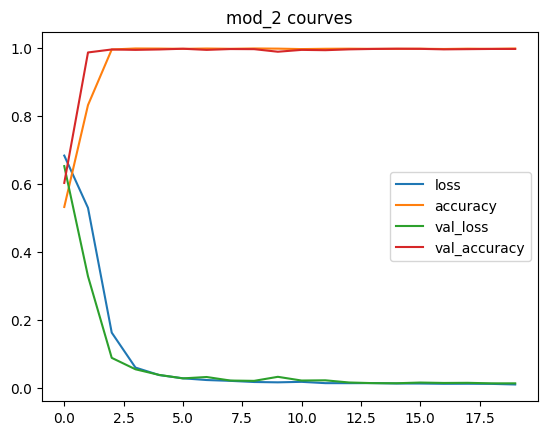

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("mod_2 courves")

The orange and red lines labeled accuracy and val_accuracy represent the accuracy metrics of the training and testing set - respectively. Both lines started near 0.6 and then rapidly increased until they reached about 0.98 - given that, the closer to 1.0 the better. On the other hand, the blue and green lines labeled loss and val_loss, representing the loss metric of the training and testing set, start near 0.69 and then rapidly decrease until reaching about 0.1 - given that the closer from 0.0 is better. Then, the adjusted model learned almost 5.3 times faster, and the loss rate was about 2 times better than the baseline model.

## **Conclusion**
In a Data Scientist's daily days, the Neural Networs training can be an exhaustive and expensive process, however, starting it with some criteria must be advantageous and efficient, bringing concise results right at the beginning of the experimental journey. I hope that this nonacademic explanation has helped those who are starting to work with Neural Networks as well as those who have experience in reinforcing their knowledge.